In [1]:
import matplotlib.pyplot as plt
import time
import torch
from torch import logsumexp
from torch.distributions.normal import Normal
import numpy as np
from utils import *
from plots import *
from objectives import *

In [2]:
## training parameters
STEPS = 100
NUM_SAMPLES = 5
NUM_SAMPLES_SNR = 100
LEARNING_RATE = 1e-3
## model parameters
p_mu = torch.tensor([0.0])
p_sigma = torch.tensor([1.0])
q_mu = torch.tensor([3.0], requires_grad=True)
q_sigma = torch.tensor([2.0], requires_grad=True) 
## initialize optimizer
optimizer = torch.optim.SGD([q_mu, q_sigma], lr=LEARNING_RATE)
## estimators
ests = ['mc', 'iwae', 'iwae-dreg', 'rws', 'rws-dreg', 'stl']

In [3]:
dEUBOs = dict()
dELBOs = dict()
dIWELBOs = dict()
dSNRs = dict()
dVARs = dict()
dESSs = dict()

for est in ests:
    ## model parameters
    p_mu = torch.tensor([0.0])
    p_sigma = torch.tensor([1.0])
    q_mu = torch.tensor([4.0], requires_grad=True)
    q_sigma = torch.tensor([2.0], requires_grad=True) 
    ## initialize optimizer
    optimizer = torch.optim.SGD([q_mu, q_sigma], lr=LEARNING_RATE)
    print('======= start training by %s ========\n' % est)
    if est == 'mc':
        EUBOs, ELBOs, IWELBOs, ESSs, SNRs, VARs = train(mc, q_mu, q_sigma, p_mu, p_sigma, STEPS, NUM_SAMPLES, NUM_SAMPLES_SNR, optimizer, filename=est, alpha=None)        
    elif est == 'iwae':
        EUBOs, ELBOs, IWELBOs, ESSs, SNRs, VARs = train(iwae, q_mu, q_sigma, p_mu, p_sigma, STEPS, NUM_SAMPLES, NUM_SAMPLES_SNR, optimizer, filename=est, alpha=None)        
    elif est == 'iwae-dreg':
        EUBOs, ELBOs, IWELBOs, ESSs, SNRs, VARs = train(dreg, q_mu, q_sigma, p_mu, p_sigma, STEPS, NUM_SAMPLES, NUM_SAMPLES_SNR, optimizer, filename=est, alpha=0.0)        
    elif est == 'rws':
        EUBOs, ELBOs, IWELBOs, ESSs, SNRs, VARs = train(rws, q_mu, q_sigma, p_mu, p_sigma, STEPS, NUM_SAMPLES, NUM_SAMPLES_SNR, optimizer, filename=est, alpha=None)      
    elif est == 'rws-dreg':
        EUBOs, ELBOs, IWELBOs, ESSs, SNRs, VARs = train(dreg, q_mu, q_sigma, p_mu, p_sigma, STEPS, NUM_SAMPLES, NUM_SAMPLES_SNR, optimizer, filename=est, alpha=1.0)      

    dEUBOs[est] = EUBOs
    dELBOs[est] = ELBOs
    dIWELBOs[est] = IWELBOs
    dSNRs[est] = SNRs
    dVARs[est] = VARs
    dESSs[est] = ESSs
    print('======= end training by %s ========\n' % est)

======= start training by mc ========

iteration:0, EUBO:-0.930, ELBO:-6.394, IWELBO:-2.319, ESS:1.090 (0s)
======= end training by mc ========

======= start training by iwae ========

iteration:0, EUBO:-5.025, ELBO:-12.867, IWELBO:-5.927, ESS:1.639 (0s)
======= end training by iwae ========

======= start training by iwae-dreg ========

iteration:0, EUBO:-1.569, ELBO:-16.627, IWELBO:-2.324, ESS:2.174 (0s)
======= end training by iwae-dreg ========

======= start training by rws ========

iteration:0, EUBO:0.578, ELBO:-3.599, IWELBO:-0.555, ESS:1.314 (0s)
======= end training by rws ========

======= start training by rws-dreg ========

iteration:0, EUBO:4.111, ELBO:-7.829, IWELBO:2.714, ESS:1.110 (0s)
======= end training by rws-dreg ========

======= start training by stl ========

iteration:0, EUBO:1.001, ELBO:-3.487, IWELBO:-0.009, ESS:1.633 (0s)
======= end training by stl ========



In [41]:
def plot_results(dEUBOs, dELBOs, dIWELBOs, dESSs, dSNRs, dVARs, num_samples, ests, fs=10):
    fig = plt.figure(figsize=(fs,fs))
    colors = {'mc':'green', 'iwae': 'red', 'iwae-dreg': 'blue', 
              'rws': 'deepskyblue', 'rws-dreg': 'firebrick', 'stl': 'black'}
    fig = plt.figure(figsize=(fs,fs))
    ax = fig.subplots(5, 3, gridspec_kw={'wspace':0.1, 'hspace':0.1})
    
    for i, est in enumerate(ests):
        EUBOs = dEUBOs[est]
        ELBOs = dELBOs[est]
        IWELBOs = dIWELBOs[est]
        ESSs = dESSs[est]
        SNRs = dSNRs[est]
        VARs = dVARs[est]
        if est == 'mc':
            ax[0, 0].plot(EUBOs, c=colors[est], label=est)
            ax[1, 0].plot(ELBOs, c=colors[est], label=est)
            ax[2, 0].plot(IWELBOs, c=colors[est], label=est)
            ax[3, 0].plot(SNRs, c=colors[est], label=est + '-snr')
            ax[3, 0].plot(VARs, marker='o', c=colors[est], label=est + '-var')
            ax[4, 0].plot(ESSs, c=colors[est], label=est)           
        elif est == 'iwae' or est == 'iwae-dreg':
            ax[0, 1].plot(EUBOs, c=colors[est], label=est)
            ax[1, 1].plot(ELBOs, c=colors[est], label=est)
            ax[2, 1].plot(IWELBOs, c=colors[est], label=est)
            ax[3, 1].plot(SNRs, c=colors[est], label=est + '-snr')
            ax[3, 1].plot(VARs, marker='o', c=colors[est], label=est + '-var')
            ax[4, 1].plot(ESSs, c=colors[est], label=est)       
        elif est =='rws' or est == 'rws-dreg':
            ax[0, 2].plot(EUBOs, c=colors[est], label=est)
            ax[1, 2].plot(ELBOs, c=colors[est], label=est)
            ax[2, 2].plot(IWELBOs, c=colors[est], label=est)
            ax[3, 2].plot(SNRs, c=colors[est], label=est + '-snr')
            ax[3, 2].plot(VARs, marker='o', c=colors[est], label=est + '-var')
            ax[4, 2].plot(ESSs, c=colors[est], label=est)  
            
    ax[0, 1].set_title('EUBO')
    ax[1, 1].set_title('ELBO')
    ax[2, 1].set_title('IWELBO')
    ax[3, 1].set_title('SNR and Variance')
    ax[4, 1].set_title('ESS')
    
    for i in range(5):
        for j in range(3):
            ax[i, j].legend(fontsize=14)
            ax[i, j].tick_params(labelsize=14)
            if i == 3:
                ax[i, j].set_yscale('log')
#     plt.savefig(PATH + '_results_%dsamples.svg' % num_samples)

<Figure size 2160x2160 with 0 Axes>

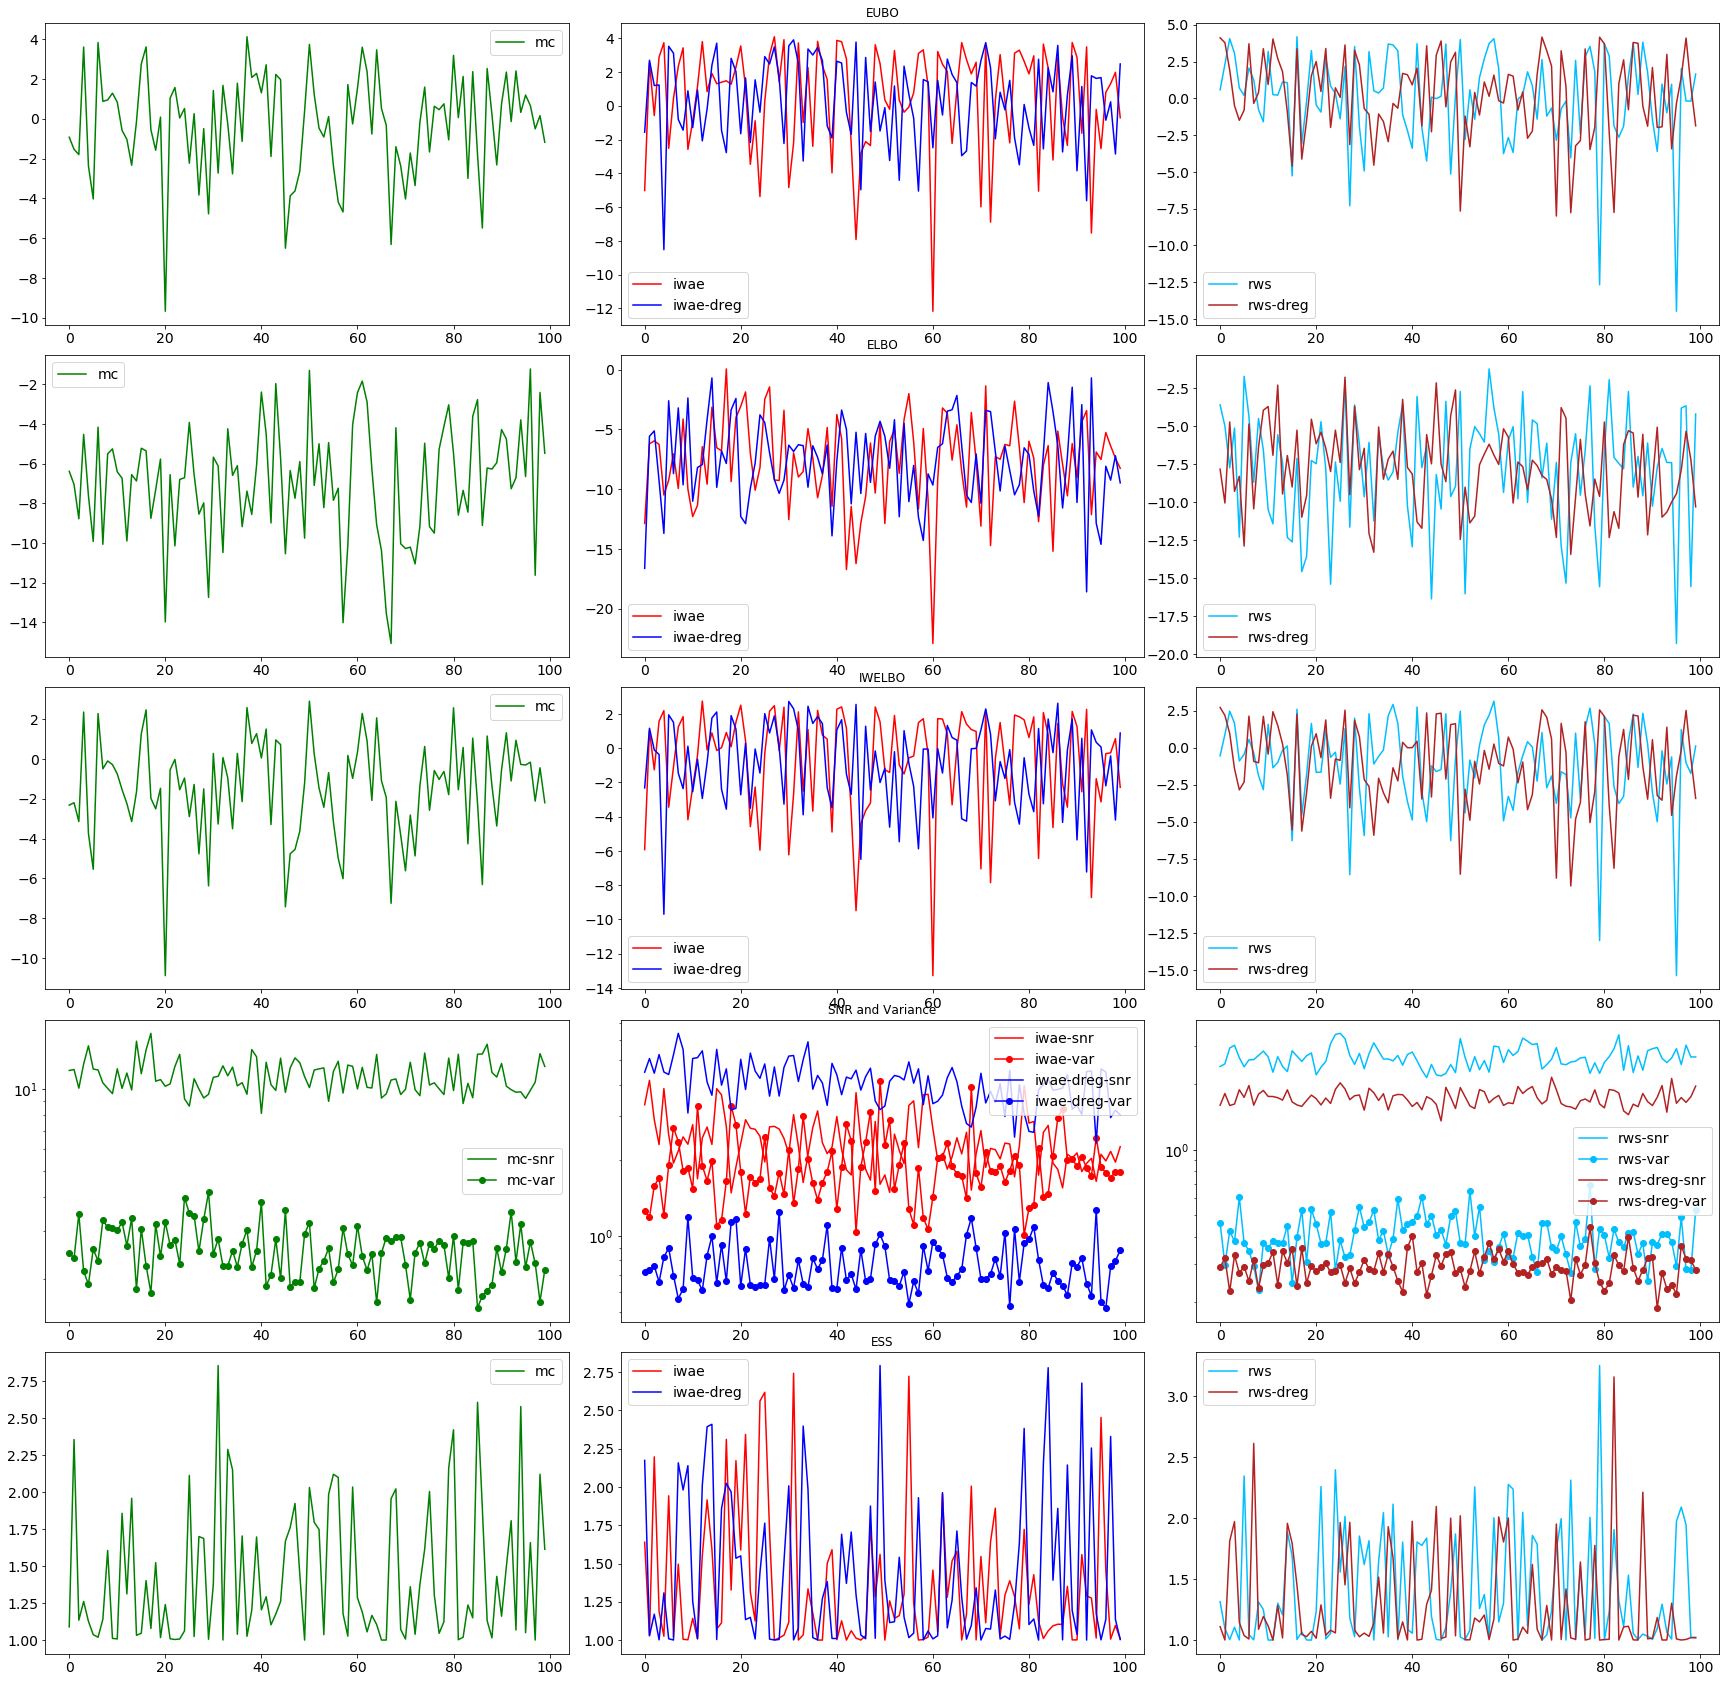

In [42]:
plot_results(dEUBOs, dELBOs, dIWELBOs, dESSs, dSNRs, dVARs, NUM_SAMPLES, ests, fs=30)